In [43]:
# https://diane-space.tistory.com/90

In [44]:
import pandas as pd
import numpy as np

# 데이터 읽어오기
movies = pd.read_csv("/content/drive/MyDrive/SeSAC/SeSAC_Study/data/movies.csv")
ratings = pd.read_csv("/content/drive/MyDrive/SeSAC/SeSAC_Study/data/ratings.csv")

movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [45]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [46]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  27278 non-null  int64 
 1   title    27278 non-null  object
 2   genres   27278 non-null  object
dtypes: int64(1), object(2)
memory usage: 639.5+ KB


In [47]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   userId     1048575 non-null  int64  
 1   movieId    1048575 non-null  int64  
 2   rating     1048575 non-null  float64
 3   timestamp  1048575 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 32.0 MB


In [48]:
# 아이템 기반 협업 필터링
data = pd.merge(ratings, movies, on="movieId") # movieId를 기준으로 ratings와 movies 데이터 병합
column=['userId','movieId','rating', 'title','genres'] # 아래 피벗테이블 만들려고 이렇게 있던거를 숫자형말고 다 뺐음
# column=['userId','movieId','rating']
data = data[column]
data

moviedata = data.pivot_table(index='movieId',columns='userId', values='rating') # Column : userId, index : movieId, 값 : 평점
moviedata

userId,1,2,3,4,5,6,7,8,9,10,...,7111,7112,7113,7114,7115,7116,7117,7118,7119,7120
movieId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,4.0,NaN,NaN,5.0,NaN,4.0,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,4.0,4.0,NaN,5.0,4.5
2,3.5,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
3,NaN,4.0,NaN,NaN,NaN,3.0,3.0,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,3.5,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 협업 필터링(Collaborative Filtering)
 - 추천 시스템에서 가장 널리 사용되는 기법 중 하나

## 1) 사용자 기반 협업 필터링(User-Based Collaborative Filtering)
 - 특정 사용자가 과거에 좋아했던 아이템을 다른 유사한 사용자들이 좋아하는 아이템과 비교하여 추천을 생성하는 방식

 <단계>
 1. 유사한 사용자 찾기
  - 각 사용자 간의 유사도를 계산
  - 유사도 계산에는 유클리드 거리, 피어슨 상관계수, 코사인 유사도 등이 사용된다.
 2. 유사한 사용자의 평점 데이터 수집
  - 유사도가 높은 사용자가 평가한 아이템을 수집한다.
 3. 추천 아이템 선택
  - 유사한 사용자가 높게 평가한 아이템을 추천
  - 이때 특정 사용자가 아직 평가하지 않은 아이템을 추천 리스트에 포함시킴

## 2) 아이템 기반 협업 필터링(Item-Based Collaborative Filtering)
 - 사용자가 특정 아이템을 평가한 평점을 바탕으로, 해당 아이템과 유사한 다른 아이템을 추천하는 방식

 <단계>
 1. 유사한 아이템 찾기
  - 각 아이템 간의 유사도를 계산
  - 이때도 유사도 계산에는 다양한 방법이 사용됨
 2. 사용자가 평가한 아이템과 유사한 아이템 수집
  - 사용자가 높게 평가한 아이템과 유사한 다른 아이템들을 수집
 3. 추천 아이템 선택
  - 유사한 아이템들 중 사용자가 아직 평가하지 않은 아이템을 추천

## 협업 필터링의 장단점
 장점

  - 데이터 의존적 : 콘텐츠의 세부 정보 없이 사용자와 아이템 간의 상호작용 데이터만으로 추천을 생성할 수 있다.
  - 확장성 : 다양한 도메인에서 사용할 수 있으며, 새로운 아이템이 추가될 때에도 쉽게 확장할 수 있다.


 단점

  - 콜드 스타트 문제 : 새로운 사용자나 아이템에 대한 데이터가 부족하면 추천을 생성하기 어렵다
  - 데이터 희소성 문제 : 사용자-아이템 상호작용 데이터가 희소한 경우 유사도 계산이 어려워질 수 있다.
  - 계산 비용 : 모든 사용자 또는 아이템 간의 유사도를 계산해야 하므로, 데이터셋이 커질수록 계산 비용이 증가

In [49]:
# NaN값을 -1로 변경 (평점을 계산할 때 양수값만 처리하면 됌)
moviedata.fillna(-1, inplace=True)
moviedata

userId,1,2,3,4,5,6,7,8,9,10,...,7111,7112,7113,7114,7115,7116,7117,7118,7119,7120
movieId,,,,,,,,,,,,,,,,,,,,,
1,-1.0,-1.0,4.0,-1.0,-1.0,5.0,-1.0,4.0,-1.0,4.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,4.0,4.0,-1.0,5.0,4.5
2,3.5,-1.0,-1.0,-1.0,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,4.0
3,-1.0,4.0,-1.0,-1.0,-1.0,3.0,3.0,5.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,4.0,-1.0,-1.0,-1.0
4,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
5,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,4.0,3.5,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130073,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
130219,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
130462,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


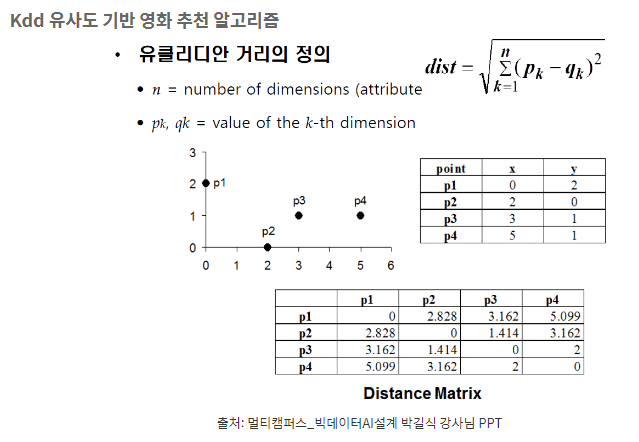

In [50]:
# kdd 유사도 함수
from math import sqrt
def sim_distance(data, n1, n2):
  sum=0
  for i in data.loc[n1, data.loc[n1, :] >=0].index:
    if data.loc[n2, i]>=0:
      sum += pow(data.loc[n1, i] - data.loc[n2,i],2)
  return sqrt(1/(sum+1))

# line 5 : 두 사용자가 모두 본 영화를 기준으로 해야해서 i로 변수 통일(j따로 안써줌)
# line 7 : 누적합
# line 8 : 유사도 형식으로 출력

## 코드 분석
### KDD(Knowledge Discovery in Databases)
 - ex)  
 A: {'영화1': 4, '영화2': 5, '영화3': 3}  
 B: {'영화1': 3, '영화2': 4, '영화3': 2}  

 ```
 data.loc[n1, data.loc[n1, :] >=0].index
 ```
 이렇게 있으면 A가 평가한 영화 중 영화1,영화2,영화3의 인덱스를 가져온다.  
 ">=0"을 하는 이유는 위에 전처리 하는 과정에서 결측값을 -1로 설정했으므로 평점이 있는 값들만 불러오기 위해서이다.
 ```
 if data.loc[n2, i]>=0:
 ```
 B가 평가한 영화 중 '영화 1`이 있는지 확인한다'  
 ```
 sum += pow(data.loc[n1, i] - data.loc[n2,i],2)
 ```
 A와 B가 '영화 1'에 대해 주는 평점의 차이를 제곱하여 'sum'에 더한다.(유클리드 거리 계산)
 ```
 return sqrt(1/(sum+1))
 ```
 <sum에 +1을 하는 이유>
  - 만일 A와 B의 영화의 평점이 완전히 동일하다면 sum = 0이 된다.
  - +1을 해주지 않으면 0으로 나누는게 되므로 오류 발생.  

 <역수 취하는 이유>
  - sum의 값이 클 수록 유사도가 떨어지고 sum의 값이 작을수록 유사도가 크다는 의미이다.
   - 즉, 역수를 취한다면 유사도가 클수록 1에 가깝고, 유사도가 작을수록 0에 가까워지므로 판별하기 더 쉬워진다.  


In [54]:
# 나와 유사도가 높은 user 매칭 함수
def top_match(data, name, rank=5, simf = sim_distance):
  simList = []
  for i in data.index[-10:]:
    if name != i:
      simList.append((simf(data, name, i), i))
  simList.sort(reverse=True)
  return simList[:rank]

## 코드 분석
 < top_match >  
  - 특정 사용자와 다른 사용자들 간의 유사도를 계산하고, 이를 기반으로 유사도가 높은 상위 사용자들을 찾아주는 함수
  - 유사한 사용자들을 찾아 해당 사용자가 평가하지 않은 영화를 추천하는 데 사용될 수 있다.
  - data : 사용자와 영화 평점 데이터가 포함된 df
  - name : 기준이 되는 사용자의 이름 또는 인덱스
  - rank : 반환할 유사 사용자의 수 (default = 5)
  - simf : 유사도 함수 (default = sim_distance)  
  
--------------------------------------------------------
  
 - simList : 유사도와 해당 사용자 이름을 저장할 리스트  
 - for i in data.index[-10:] : df의 인덱스 중 마지막 10개의 사용자를 순회. 모든 사용자를 대상으로 한 완전한 매칭을 방지하기 위해  
 - if name != i : 기준 사용자와 현재 사용자가 다를 경우에만 유사도 계산하도록 조건 설정  
 - simList.append((simf(data, name, i), i)) : 유사도 함수 'simf'를 사용하여 기준 사용자 'name'과 각 사용자 'i' 사이의 유사도를 계산하고, 이를 'simList'에 추가.  
 - simList.sort(reverse=True) : 유사도를 기준으로 내림차순 정렬
 - return simList[:rank] : 상위 'rank'개의 유사 사용자 return

In [55]:
# 추천 시스템 함수
def recommendation(data, person, simf = sim_distance):
  res = top_match(data, person, len(data))
  score_dic = {}
  sim_dic = {}
  myList = []
  for sim, name in res:
    if sim < 0:
      continue
    for movie in data.loc[person, data.loc[person, :] <0].index:
      simSum=0
      if data.loc[name, movie] >= 0:
        simSum += sim * data.loc[name, movie]

        score_dic.setdefault(movie, 0)
        score_dic[movie] += simSum

        sim_dic.setdefault(movie, 0)
        sim_dic[movie] += sim

  for key in score_dic:
    myList.append((score_dic[key] / sim_dic[key], key))
  myList.sort()
  myList.reverse()

  return myList

주어진 recommendation 함수는 사용자 기반 협업 필터링을 기반으로, 특정 사용자에게 영화를 추천하는 함수입니다. 이 함수는 다음과 같은 작업을 수행합니다:

함수 설명:
함수 인자 설명:

data: 사용자와 영화 평점 데이터가 포함된 데이터 프레임 (피벗 테이블 형태로 구성되어 있음).
person: 추천을 받을 사용자의 이름 또는 인덱스.
simf: 유사도 함수 (기본값으로 sim_distance 함수 사용).
동작 과정:

res = top_match(data, person, len(data)): top_match 함수를 사용하여 person과 다른 사용자들 간의 유사도를 계산하고, 이를 기반으로 유사도가 높은 순으로 사용자를 정렬합니다.
score_dic: 영화 평점을 가중 평균하여 계산된 예상 점수를 저장할 딕셔너리.
sim_dic: 각 영화의 가중치 합계를 저장할 딕셔너리.
myList: 최종적으로 반환될 추천 목록을 저장할 리스트.
추천 과정:

for sim, name in res:: 유사도가 높은 순으로 정렬된 사용자 목록을 순회합니다.
if sim < 0: continue: 유사도가 음수인 경우는 무시하고 다음 사용자로 넘어갑니다.
for movie in data.loc[person, data.loc[person, :] < 0].index:: person이 평가하지 않은 영화 목록을 순회합니다.
if data.loc[name, movie] >= 0:: 해당 사용자 name이 평가한 영화 movie에 대해 평점이 있는 경우에만 아래의 작업을 수행합니다.
simSum += sim * data.loc[name, movie]: 해당 영화에 대한 가중치 합계 simSum을 계산합니다.
score_dic.setdefault(movie, 0): 만약 score_dic에 영화 movie가 없으면 초기값 0을 설정합니다.
score_dic[movie] += simSum: 해당 영화의 가중 평균 점수에 simSum을 추가합니다.
sim_dic.setdefault(movie, 0): 만약 sim_dic에 영화 movie가 없으면 초기값 0을 설정합니다.
sim_dic[movie] += sim: 해당 영화에 대한 가중치 합계를 증가시킵니다.
최종 추천 목록 생성:

for key in score_dic:: score_dic에 저장된 각 영화에 대해 다음을 수행합니다.
myList.append((score_dic[key] / sim_dic[key], key)): 각 영화의 가중 평균 점수를 해당 영화와 함께 myList에 추가합니다.
myList.sort(): 평균 점수를 기준으로 오름차순으로 정렬합니다.
myList.reverse(): 정렬된 리스트를 내림차순으로 변경하여 평균 점수가 높은 순으로 정렬합니다.
return myList: 최종적으로 평균 점수가 높은 순으로 정렬된 추천 목록을 반환합니다.
함수 사용 예시:
예를 들어, 특정 사용자 A에 대해 recommendation(moviedata, A)를 호출하면, A와 유사한 사용자들이 평가하지 않은 영화들에 대해 가중 평균 점수를 계산하고, 이를 평균 점수가 높은 순으로 정렬하여 A에게 추천할 수 있는 영화 목록을 제공합니다.

이 함수는 사용자 기반 협업 필터링에서 주로 사용되며, 개인화된 추천 시스템을 구현하는 데 중요한 역할을 합니다.

In [56]:
# 25번 user가 안 본 영화 중에서
# 추천 점수가 가장 높은 순으로 예상 평점과 영화제목을 추천 (10개까지)

movieList = []
for rate, m_id in recommendation(moviedata, 25):
  movieList.append((rate, movies.loc[movies['movieId'] == m_id, 'title'].values[0]))
movieList[:10]

# movieList = []
# for rate, m_id in recommendation(moviedata, 25):
#     movieList.append((rate, movies.loc[movies['movieId'] == m_id, 'title'].values[0]))
# movieList[:10]

[(4.5, "Dracula (Bram Stoker's Dracula) (1992)"),
 (3.5, 'Born Yesterday (1993)'),
 (3.5, 'Great Muppet Caper, The (1981)'),
 (3.5, 'Return with Honor (1998)'),
 (3.0, 'Left Behind II: Tribulation Force (2002)'),
 (2.5, 'Bully (2001)'),
 (1.0, "Christmas Vacation (National Lampoon's Christmas Vacation) (1989)"),
 (0.5, 'Here on Earth (2000)')]

In [ ]:
# 피어슨 상관계수
def sim_pearson(data, n1, n2):
  # 구현
  sumX = 0
  sumY = 0
  sumSqX = 0 # x 제곱합
  sumSqY = 0 # y 제곱합
  sumXY = 0 # XY 합
  cnt = 0 # 영화 갯수
  for i in data.loc[n1, data.loc[n1,:]>=0].index:
    if data.loc[n2,i] >=0:
      sumX += data.loc[n1, i]
      sumY += data.loc[n2, i]
      sumSqX += pow(data.loc[n1, i], 2)
      sumSqY += pow(data.loc[n2, i], 2)
      sumXY += (data.loc[n1, i]) * (data.loc[n2, i])
      cnt += 1
      global num # 전역변수 선언
      global den # 전역변수 선언
      num = sumXY - ((sumX * sumY) / cnt)
      den = (sumSqX - (pow(sumX, 2)/cnt)) * (sumSqY - (pow(sumY, 2)/cnt))
  return num / sqrt (den+0.00001) # 분모 = 0 방지

In [ ]:
# 나와 유사도가 높은 user와 매칭 함수
def top_match(data, name, rank = 5, simf = sim_pearson):
  simList = []
  for i in data.index:
    if name != i:
      if simf(data, name, i) is not None:
        simList.append((simf(data, name, i), i))
  simList.sort()
  simList.reverse()
  return simList[:rank]

In [ ]:
# 추천 시스템 함수
def recommendation(data, person, simf = sim_pearson):
  res = top_match(data, person, len(data))
  score_dic = {}
  sim_dic = {}
  myList = []
  for sim, name in res:
    if sim < 0:
      continue
    for movie in data.loc[person, data.loc[person, :] < 0].index:
      simSum=0
      if data.loc[name, movie] >= 0:
        simSum += sim * data.loc[name, movie]

        score_dic.setdefault(movie, 0)
        score_dic[movie] += simSum

        sim_dic.setdefault(movie, 0)
        sim_dic[movie] += sim

  for key in score_dic:
    myList.append((score_dic[key] / sim_dic[key], key))
  myList.sort()
  myList.reverse()

  return myList

In [ ]:
# movieList = []
# for rate, m_id in recommendation(moviedata, 1):
#   movieList.append((rate, movies.loc[movies['movieId'] == m_id, "title"].values[0]))
#   if len(movieList) == 10:
#     break
# movieList[:10]

# 7분동안 돌려도 계속 돌아감. 안쓰고 말지 이건.

In [ ]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/SeSAC/SeSAC_Study/data/movies_metadata.csv", encoding="UTF-8")
data = data.head(20000) # 데이터가 많은 관계로 20000개까지 짜름
data.head()

In [ ]:
data.info()

In [ ]:
data['overview'].isnull().sum() # 135
data['overview'] = data['overview'].fillna('')
data['overview'].isnull().sum() # 0으로 바뀜. 내적하면 모두 0으로 나옴

In [ ]:
# tf-idf행렬 생성
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = 'english') # 불용어 제거
tfidf_mat = tfidf.fit_transform(data['overview']).toarray()
# 줄거리 행렬에 대한 tf-dft행렬을 생성하여 단어의 빈도수를 나타내고 array(배열)로 변경

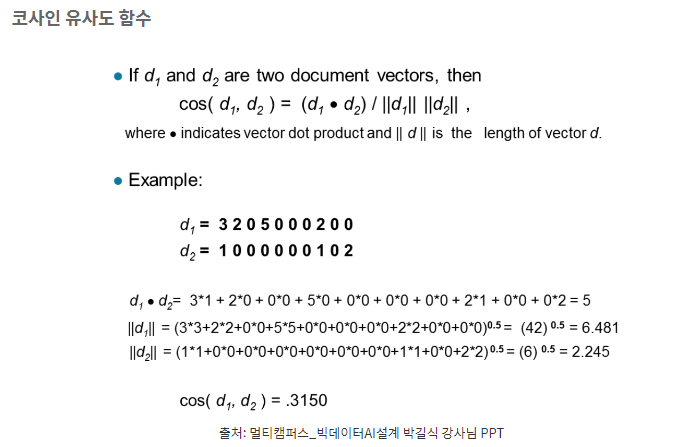

In [ ]:
# 코사인유사도함수 2 (분모 = 10)
from numpy.linalg import norm
def cos_sim2(X,Y):
  return np.dot(X,Y) / ((norm(X) * norm(Y)) + 1e-7)
  # 분모가 0이 되지 않도록 1e-7 값을 넣어줄 것

In [ ]:
# 추천 함수
def top_match_ar2(data, name, rank=5, simf=cos_sim2):
  sim=[]
  for i in range(len(data)):
    if name != i:
      sim.append((simf(data[i], data[name]), i))
  sim.sort()
  sim.reverse()
  return sim[:rank]

In [ ]:
# 영화 추천 (영화제목, 코사인유사도) 출력
# Toystory와 코사인유사도가 비슷한 순으로 영화 추천 : (영화제목, 코사인유사도)
movieList = []
for sim, movie_id in top_match_ar2(tfidf_mat, 0, 10):
  movieList.append((sim, data.loc[movie_id, 'title']))
movieList[:10]
# 실제로 Toy Story와 줄거리가 비슷한 Toy Story 3, Toy Story 2가 출력되었음을 확인할 수 있음